# Iris flower classification project!! 🌼

## Problem :
To classify the iris flowers into their species by training various machine learning models to learn from the measurements and classify them accordingly.

## Data :
The dataset can be found here : https://www.kaggle.com/datasets/arshid/iris-flower-dataset

## Model Building :
We will be using various classification models like logistic regression, random forest classifier and K neighbors classifier.

## Evaluation metrics :
we will be evaluating the model's performance using Confusion matrix.

## Tools required :

In [1]:
#importing all the EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modelling libraries
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

#evaluation metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset
df = pd.read_csv("C:\\Users\\aryas\\OneDrive\\Desktop\\IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#summary statistics
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#check for missing values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### There are no missing values present in the dataset.

## EDA (exploratory data analysis)

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


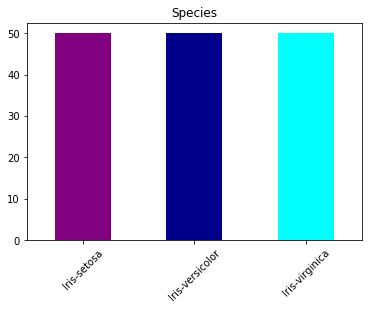

In [8]:
#visualize the species column
colors = ["purple","darkblue","cyan"]
df["species"].value_counts().plot(kind = "bar", color = colors)
plt.title("Species")
plt.xticks(rotation = 45)
plt.show()

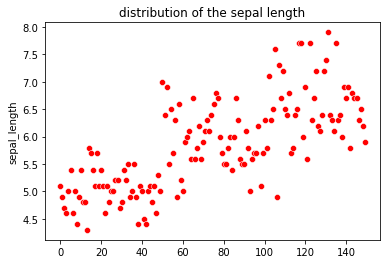

In [9]:
#speal length
color =["red"]
sns.scatterplot(data=df["sepal_length"], color = color)
plt.title("distribution of the sepal length");

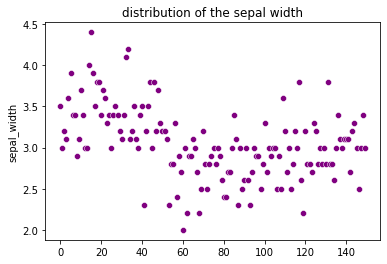

In [10]:
#sepal width
color = ["purple"]
sns.scatterplot(data= df["sepal_width"], color = color)
plt.title("distribution of the sepal width");

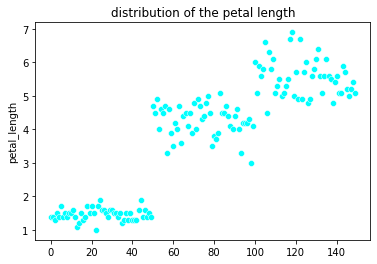

In [11]:
#petal length
color = ["cyan"]
sns.scatterplot(data=df["petal_length"], color = color)
plt.title("distribution of the petal length")
plt.show()

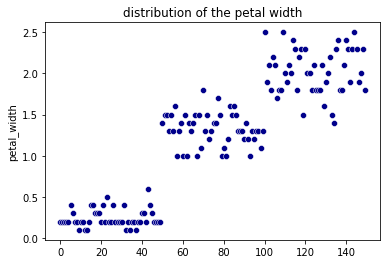

In [12]:
#petal width
color = ["darkblue"]
sns.scatterplot(data=df["petal_width"], color = color)
plt.title("distribution of the petal width")
plt.show()

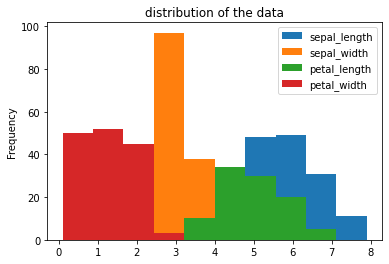

In [13]:
#check the overall distribution of the dataset
df.plot(kind = "hist")
plt.title("distribution of the data")
plt.show()

In [14]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


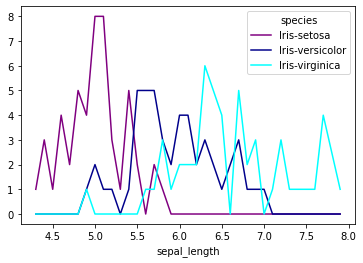

In [25]:
#let's compare the sepal length to the species
colors = ["purple","darkblue","cyan"]
pd.crosstab(df["sepal_length"], df["species"]).plot(color = colors);

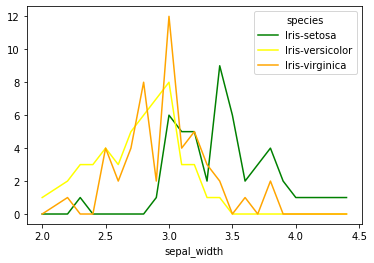

In [26]:
#comparision of sepal width to species
colors = ["green","yellow","orange"]
pd.crosstab(df["sepal_width"],df["species"]).plot(color = colors);

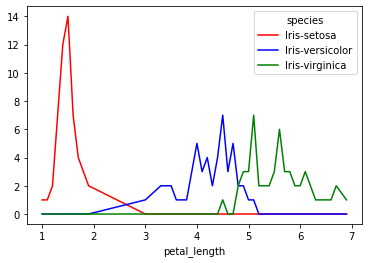

In [27]:
#comparision of petal length to species
colors = ["red","blue","green"]
pd.crosstab(df["petal_length"],df["species"]).plot(color = colors);

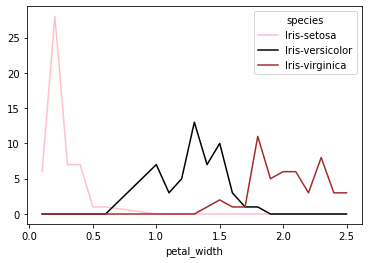

In [28]:
#comparison of petal width to species
colors = ["pink","black","brown"]
pd.crosstab(df["petal_width"],df["species"]).plot(color = colors);

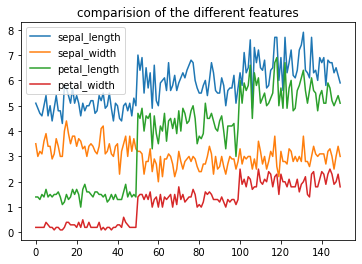

In [29]:
df.plot()
plt.title("comparision of the different features");

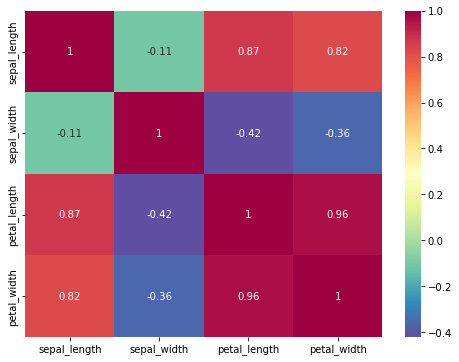

In [42]:
#correlation matrix
plt.figure(figsize = (8,6))
sns.heatmap(data=df.corr(), annot = True, cmap="Spectral_r");

### Modelling

In [45]:
#split the dataset into target and feature variables
x = df.drop("species", axis = 1)
y = df["species"]

In [46]:
x.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64

In [47]:
y.isnull().sum()

0

In [48]:
x.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [49]:
y.dtypes

dtype('O')

In [51]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [52]:
#since the target column is not in a numerical column, we will convert it using map function.
transformed_y = y.map({"Iris-setosa":0,"Iris-versicolor":1,"Iris-virginica":2})

In [53]:
transformed_y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [55]:
#split it into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, transformed_y, test_size=0.2,random_state=42)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [56]:
# Put models in a dictionary
models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(), 
          "Random Forest": RandomForestClassifier()}

# Create function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data
    X_test : testing data
    y_train : labels assosciated with training data
    y_test : labels assosciated with test data
    """
    # Random seed 
    np.random.seed(42)
    # Make a list to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [58]:
#let's use our function now to fit and score 
fit_and_score(models, x_train, x_test, y_train, y_test)

{'KNN': 1.0, 'Logistic Regression': 1.0, 'Random Forest': 1.0}

### We got a 100% accuracy with the trained models.
usually, this indicates that there is an overfitting problem, but since this is a very small dataset it is ok to have 100% accuracy.

In [61]:
#let's use a logistic regression model for the predictions
y_preds = models["Logistic Regression"].predict(x_test)

In [74]:
y_preds

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0], dtype=int64)

In [75]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: species, dtype: int64

In [80]:
#confusion matrix
conf_matrix_lr = confusion_matrix(y_test, y_preds)

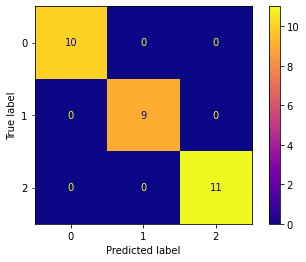

In [98]:
ConfusionMatrixDisplay(conf_matrix_lr).plot(cmap="plasma");